## import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# load data

In [2]:
df = pd.read_csv('Dataset Data Divination.csv')
df

,Unnamed: 0,Service_provider,technology,Download_Upload,Data_Speed(Kbps),signal_strength,Service_Area
0,0,AIRTEL,4G,download,4794,-53.0,UP East
1,1,AIRTEL,4G,upload,536,-59.0,UP East
2,2,JIO,4G,download,38507,-59.0,UP West
3,3,JIO,4G,download,78938,-59.0,UP West
4,4,JIO,4G,upload,3560,-59.0,UP West
...,...,...,...,...,...,...,...
3995,3995,JIO,4G,upload,5419,-69.0,UP East
3996,3996,VODAFONE,4G,download,139,NaN,Delhi
3997,3997,VODAFONE,4G,download,22,-73.0,Delhi
3998,3998,JIO,4G,download,14804,-61.0,Delhi


In [3]:
df.groupby('Service_provider').count()

,Unnamed: 0,technology,Download_Upload,Data_Speed(Kbps),signal_strength,Service_Area
Service_provider,,,,,,
AIRTEL,669,669,669,669,546,669
CELLONE,205,205,205,205,74,205
IDEA,338,338,338,338,300,338
JIO,1983,1983,1983,1983,1836,1983
VODAFONE,805,805,805,805,696,805


## 1. Replace- ('AIRTEL', 'JIO', 'CELLONE', 'VODAFONE', 'IDEA') with (0,1,2,3,4) respectively

In [4]:
df_1 = df['Service_provider'].replace(['AIRTEL','CELLONE','IDEA','JIO','VODAFONE'],[0,1,2,3,4] )
df_1


0       0
1       0
2       3
3       3
4       3
       ..
3995    3
3996    4
3997    4
3998    3
3999    4
Name: Service_provider, Length: 4000, dtype: int64

## 2. Replace- (dowload,upload) with (0,1) respectively.

In [5]:
df['Download_Upload'].replace(['download','upload'],[0,1])


0       0
1       1
2       0
3       0
4       1
       ..
3995    1
3996    0
3997    0
3998    0
3999    1
Name: Download_Upload, Length: 4000, dtype: int64

## 3. Fill null values (if any) with median of that column.

In [6]:
df.describe()

,Unnamed: 0,Data_Speed(Kbps),signal_strength
count,4000.000000,4000.000000,3452.000000
mean,1999.500000,8315.810000,-82.202491
std,1154.844867,15561.302023,18.173601
min,0.000000,0.000000,-112.000000
25%,999.750000,772.750000,-100.000000
50%,1999.500000,2749.500000,-81.000000
75%,2999.250000,7968.250000,-67.000000
max,3999.000000,80755.000000,-51.000000


In [7]:
# getting the average of signal_strength (avgss)
avgss = df['signal_strength'].median()
print('meadian of signal_strength is',avgss)
# replacing nan with meadian
df['signal_strength'].fillna(avgss)


meadian of signal_strength is -81.0


0      -53.0
1      -59.0
2      -59.0
3      -59.0
4      -59.0
        ... 
3995   -69.0
3996   -81.0
3997   -73.0
3998   -61.0
3999   -73.0
Name: signal_strength, Length: 4000, dtype: float64

## 4. Calculate the mean Data_Speed of the records having Service_provider 0 or 2.

In [8]:
df.loc[df['Service_provider'] == 0 |2]['Data_Speed(Kbps)'].mean()


nan

## 5.Make a visualization to show the relationship between 'Service_provider' and 'Data_Speed(Kbps)' using Matplotlib package in Python

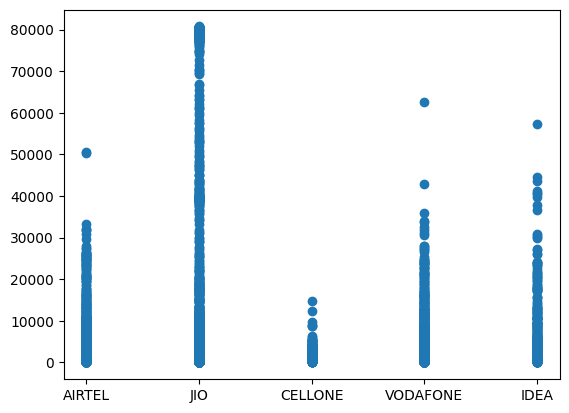

In [9]:
x = df['Service_provider']
y = df['Data_Speed(Kbps)']
plt.plot(x,y,'o' )
# plt.set_xticklabels(['AIRTEL','CELLONE','IDEA','JIO','VODAFONE'])
plt.show()

## 6 Count the number of records having signal_strength less than -78.

In [10]:
# will use df_na dataset n wich nan values have been replaced with median of dataset
df.loc[df['signal_strength']<-78].count()

Unnamed: 0          1822
Service_provider    1822
technology          1822
Download_Upload     1822
Data_Speed(Kbps)    1822
signal_strength     1822
Service_Area        1822
dtype: int64

## 7. Explain about the nature of Histogram of 'Data_Speed(Kbps)' feature. Visualize it using Seaborn library.

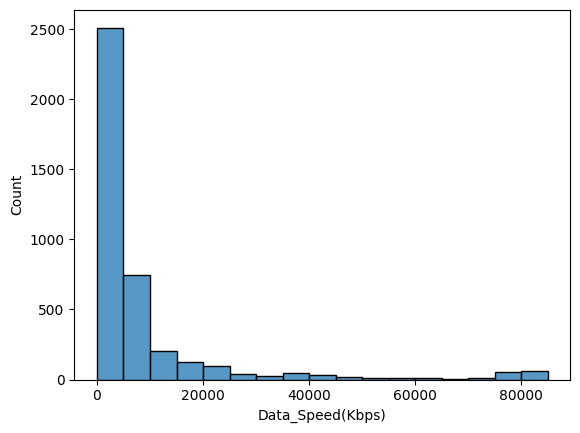

In [11]:
z = df['Data_Speed(Kbps)']
sns.histplot(z, binwidth = 5000)
plt.show()

graph depicting that there are lot more number of counts which have less speed 

## 8. Describe the numerical features in the data-set statistically.

In [12]:
df.describe()

,Unnamed: 0,Data_Speed(Kbps),signal_strength
count,4000.000000,4000.000000,3452.000000
mean,1999.500000,8315.810000,-82.202491
std,1154.844867,15561.302023,18.173601
min,0.000000,0.000000,-112.000000
25%,999.750000,772.750000,-100.000000
50%,1999.500000,2749.500000,-81.000000
75%,2999.250000,7968.250000,-67.000000
max,3999.000000,80755.000000,-51.000000


## 9. Model the Regression relationship between Data_Speed(Kbps) and signal_strength

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


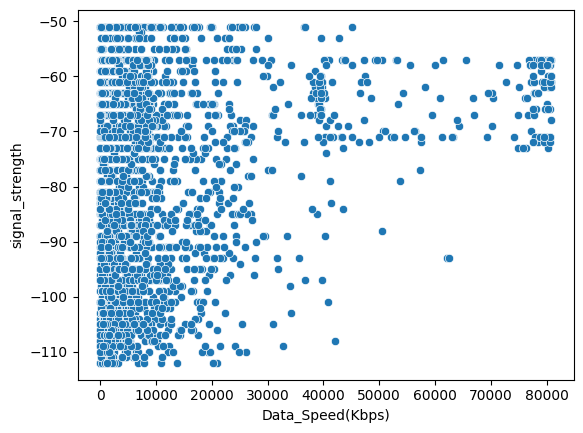

In [19]:
x1 = df['Data_Speed(Kbps)']
y1 = df['signal_strength']
sns.scatterplot(x1,y1)
# plt.xlim(0,50)
# plt.ylim(0,50)

plt.show()

In [23]:
# regresssion
c = sm.add_constant(x1)
result = sm.OLS(y1,c).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        signal_strength   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 29 Aug 2022   Prob (F-statistic):                nan
Time:                        21:13:38   Log-Likelihood:                    nan
No. Observations:                4000   AIC:                               nan
Df Residuals:                    3998   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                   nan        nan        nan        nan         nan         nan
Data_Speed(Kbps)        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""